# Milestone 1

# A) Business Background



### Business Requirement and Objective

PasseoPremier, an Indonesian investment startup which makes an application that can buy and sell mutual funds (Reksadana).

The Mutual funds consists of
1.   Stock Mutual Funds (Pasar Uang)
2.   Band Mutual Funds (Pendapatan tetap)
3.   Money Market Mutual Funds (Pasar Uang)
4.   Mixed-investment mutual funds (campuran)

Our head of data, Mr Djoko would like us to solve a problem
*   What kind of thematic campaigns that we can recommend to the marketing team for the next month?

Context of request: The marketing team wants to create a **thematic campaign** based on **user preference**. Marketing team request us to create a segmentation for this thematic campaign and give recommendations (as objective) on the themes on each campaign

#### Dataset
Users (Spreadsheet):
*   https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit?usp=sharing

daily_user_transaction (Spreadsheet):
*   https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit?usp=sharing









A thematic campaign is a type of marketing campaign that is designed to promote a particular theme or message rather than a specific product or service. The goal of a thematic campaign is to create an emotional connection with the target audience by appealing to their values, beliefs, or interests.

Thematic campaigns are often used to build brand awareness, create a sense of community around a brand, or reinforce the brand's core values. They may involve the use of storytelling, visuals, or social media to engage the audience and communicate the campaign message.

Thematic campaigns are different from product-specific campaigns, which are focused on promoting a particular product or service. Thematic campaigns are broader in scope and aim to create a more emotional connection with the audience that goes beyond the specific features or benefits of a product.

####**Data Dictionary**

1. user_id = Client ID on the platform
2. date = Date of the transaction
3. buy/sell_saham_transaction_amount = Amount of Saham Mutual fund that are bought/sell by user at that date
4. buy/sell_pasar_uang_transaction_amount = Amount of Pasar Uang mutual fund that are bought by user at that date
5. buy/sell_pendapatan_tetap_transaction_amount = Amount of Pendapatan Tetap mutual fund that are bought/sell by user at that date
6. buy/sell_campuran_transaction_amount = Amount of Campuran mutual fund that are bought/sell by user at that date
7. total buy/sell_transaction_amount = total mutual fund that are bought/sell by user at that date (point 3 + point 4 + point 5 + point 6)
8. saham_invested_amount = amount of saham that are owned by user at that date
9. pasar_uang_invested_amount = amount of pasar uang mutual fund that are owned by user at that date
10. pendapatan_tetap_invested_amount = amount of pasar uang mutual fund that are owned by user at that date



# B) Data Preparation

## Import Library

In [ ]:
# CLUSTER
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to scalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

## Import Dataset

#### Users

In [ ]:
#Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

print(sheet_url_replace) #To show the link to csv

df_users = pd.read_csv(sheet_url_replace) #to load/read the csv into pandas dataframe
df_users.head(5) #Show only first 5 rows (To see how the dataset lookslike without)

https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/export?format=csv&gid=0


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


#### daily_user_transaction

In [ ]:
#Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv
print(sheet_url_replace) #To show the link to csv

df_transaction = pd.read_csv(sheet_url_replace) #to load/read the csv into pandas dataframe
df_transaction.head(5) #Show only first 5 rows (To see how the dataset lookslike without)

https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/export?format=csv&gid=0


,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


### Dataset Recovery

In [ ]:
#df_users2 as a copy of the users dataset
df_users2 = df_users.copy()

In [ ]:
#df_transaction2 as a copy of the daily transaction
df_transaction2 = df_transaction.copy()

#C) Data Cleaning

Steps to do :

1. Unique Values (Remove irrelevant values)
2. Treating missing values (state the reasoning)
3. Outliers (in loan_amount & annual_income using IQR)
4. Check Duplicates, retain only the first record
5. Check data & convert data types
6. Check typos
7. Check time series data
8. Merge the dataset

## Users

###Data Type Check and Treatment

In [ ]:
#Checking a datatype of df_users2
df_users2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


Insight
1.   registration_import_datetime can be convert into datetime
2.   Beside that everything is already good




In [ ]:
#Convert registration_import_datetime become datetime data type
df_users2['registration_import_datetime'] = pd.to_datetime(df_users['registration_import_datetime'])

In [ ]:
#convert user_id into string
df_users2['user_id'] = df_users2['user_id'].astype(str)

In [ ]:
#Checking if data cleansing already been done
df_users2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

### Typo Check and Treatment

In [ ]:
#check typo in a user_gender
df_users2['user_gender'].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [ ]:
#check typo in a user_occupation
df_users2['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [ ]:
#check typos in a user_income_range
df_users2['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

We Found a incosistent value Rp 10 juta - 50 juta, where every data there is '>' or '<'.

Recommendation:
- add '>' in every Rp 10 juta - 50 juta
- remove all '<' or '>' in a column
- only add or remove on a certain condition

Decision:
- I decide to remove '>' in 50 juta - 100 juta, 100-500 juta, 500 juta- 1 Milliar as it is unneccesary. because it only add confusion when every data 50-100, 100-500, 500, 1 Miliar already represent '>'

In [ ]:
#Remove'>' in 50 - 100 Juta, 100-500 Juta, 500 Juta - 1 Miliar, for this case i will use replace text.
target_removevalue = ['> Rp 50 Juta - 100 Juta','> Rp 100 Juta - 500 Juta','> Rp 500 Juta - 1 Miliar']
df_users2.replace(to_replace=target_removevalue,value=['Rp 50 Juta - 100 Juta','100 Juta - 500 Juta','500 Juta - 1 Miliar'],inplace=True)
df_users2['user_income_range'].value_counts()

< 10 Juta                6275
Rp 10 Juta - 50 Juta     4816
Rp 50 Juta - 100 Juta    2390
100 Juta - 500 Juta      1114
500 Juta - 1 Miliar        90
> Rp 1 Miliar              27
Name: user_income_range, dtype: int64

In [ ]:
#check typos in a referral_code_used
df_users2['referral_code_used'].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

In [ ]:
#check typos in a user_income_source
df_users2['user_income_source'].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

Typos in a user dataset has been **clean**

### Missing Value Check and Treatment

In [ ]:
#Checking Null value
df_users2.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

The Null Value in a referral_code_used the most likely because our customer is not using referral_code

Option:
- Leave the data as it is
- Remove the column entirely
- Fill the null value with not_used_referral

Decision:
i choose to fill the null vlaue with not_used_referral because we need the data because we can put referral code in a thematic campaign

In [ ]:
#i choose Fillna because only referral_code_used contains a null value, if there is null value in multiple column this code will not be fit
df_users2.fillna('not used referral', inplace = True)

In [ ]:
#Rechecking whether there is still null value
df_users2.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
dtype: int64

In [ ]:
#Checking whether referral_code_used already have 'not used referral' in it
df_users2['referral_code_used'].value_counts()

not used referral    9108
used referral        5604
Name: referral_code_used, dtype: int64

Missing Value has been treated

### Double Value Check and treatment

In [ ]:
#Check the Duplicate
df_users2[df_users2['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount


### Column Added

There are two things we could do related to the users dataset
- user_age can be group based on range age (10 years each)

In [ ]:
#Check the user_age
df_users2['user_age'].value_counts()

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64

In [ ]:
#define a to make easier in grouping
a = df_users2['user_age']

#input condition of age grouping
def age_category(a):
    if 50 < a <= 60: return '51-60 years'
    elif 40 < a <= 50: return '41-50 years'
    elif 30 < a <= 40: return '31-40 years'
    elif 20 < a <= 30: return '21-30 years'
    elif a <= 20: return '< 20 years'
    else: return '> 65 years'

#create a new column age_category
df_users2['age_category'] = df_users2['user_age'].map(age_category)
df_users2.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_category
0,162882,2021-09-17 14:10:44,Female,51,Swasta,500 Juta - 1 Miliar,not used referral,Gaji,0,0,0,51-60 years
1,3485491,2021-10-09 11:11:34,Female,55,Others,Rp 50 Juta - 100 Juta,not used referral,Gaji,0,0,0,51-60 years
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used referral,Gaji,0,0,0,41-50 years
3,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,0,51-60 years
4,3802293,2021-08-15 09:31:24,Female,47,PNS,500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,41-50 years


Users Data is Clean

## daily_user_transaction

### Data Type Check and Treatment

In [ ]:
#Check Data Type Daily_user_transaction
df_transaction2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

Insight:
- For date column we can convert into a datetime
- user_id we can convert into text since we are not going to do aricmethic to user_id

In [ ]:
#Change date into datetime
df_transaction2['date'] = pd.to_datetime(df_transaction2['date'])

In [ ]:
#convert user_id into string
df_transaction2['user_id'] = df_transaction['user_id'].astype(str)

In [ ]:
#confirm work
df_transaction2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

### Typo Check and Treatment

Because daily_user_transaction only contains numbers, checking typo and treatment is uneccesary

### Missing Value Check and Treatment

In [ ]:
#checking a null value in transaction dataset
df_transaction2.isna().sum()

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

Insight:
- Total_invested_amount is zero value this is because if the customer doesn't invest in anything the value is '0'
- the null value in **transaction** there is 0 value and null value,
Meaning
1.  0 value in the daily_transaction dataset means that the users have mutual funds but did not make any buy or sell transactions for that period
2. Null value in the daily_transaction dataset means that the users do not have any mutual funds and did not make any investments in any product.

Recommendation:
1. We can create a new column Tracking user_id whether he already invest in a mutual product, own a mutual-fund product but not invested on that date, and doesn't have one of mutual product and not invest on the product
2. we can leave it as it is, the condition in number 1 actually can be track in visualization tools

I decide to create a new column to make it easier to track whether the user_id already own and invest, already own but not invest, not own and not invest and leave the column as it is



In [ ]:
def buy_status_saham(buy_saham_transaction_amount):
  if buy_saham_transaction_amount >0: return 'buy'
  elif buy_saham_transaction_amount == 0: return 'Owned but not buy'
  else: return 'not owned and not buy'

def sell_status_saham(sell_saham_transaction_amount):
  if sell_saham_transaction_amount >0: return 'sell'
  elif sell_saham_transaction_amount == 0: return 'Owned but not sell'
  else: return 'not owned and not sell'

def buy_status_pasar_uang(buy_pasar_uang_transaction_amount):
  if buy_pasar_uang_transaction_amount >0: return 'buy'
  elif buy_pasar_uang_transaction_amount == 0: return 'Owned but not buy'
  else: return 'not owned and not buy'

def sell_status_pasar_uang(sell_pasar_uang_transaction_amount):
  if sell_pasar_uang_transaction_amount >0: return 'sell'
  elif sell_pasar_uang_transaction_amount == 0: return 'Owned but not sell'
  else: return 'not owned and not sell'

def buy_status_pendapatan_tetap(buy_pendapatan_tetap_transaction_amount):
  if buy_pendapatan_tetap_transaction_amount >0: return 'buy'
  elif buy_pendapatan_tetap_transaction_amount == 0: return 'Owned but not buy'
  else: return 'not owned and not buy'

def sell_status_pendapatan_tetap(sell_pendapatan_tetap_transaction_amount):
  if sell_pendapatan_tetap_transaction_amount >0: return 'sell'
  elif sell_pendapatan_tetap_transaction_amount == 0: return 'Owned but not sell'
  else: return 'not owned not sell'

def buy_status_campuran(buy_campuran_transaction_amount):
  if buy_campuran_transaction_amount >0: return 'buy'
  elif buy_campuran_transaction_amount == 0: return 'Owned but not buy'
  else: return 'not owned and not buy'

def sell_status_campuran(sell_campuran_transaction_amount):
  if sell_campuran_transaction_amount >0: return 'sell'
  elif sell_campuran_transaction_amount == 0: return 'Owned but not sell'
  else: return 'Not owned and not sell'

df_transaction2 = df_transaction2.assign(
    buy_status_saham=df_transaction2['buy_saham_transaction_amount'].apply(buy_status_saham),
    sell_status_saham=df_transaction2['sell_saham_transaction_amount'].apply(sell_status_saham),
    buy_status_pasar_uang=df_transaction2['buy_pasar_uang_transaction_amount'].apply(buy_status_pasar_uang),
    sell_status_pasar_uang=df_transaction2['sell_pasar_uang_transaction_amount'].apply(sell_status_pasar_uang),
    buy_status_pendapatan_tetap=df_transaction2['buy_pendapatan_tetap_transaction_amount'].apply(buy_status_pendapatan_tetap),
    sell_status_pendapatan_tetap=df_transaction2['sell_pendapatan_tetap_transaction_amount'].apply(sell_status_pendapatan_tetap),
    buy_status_campuran=df_transaction2['buy_campuran_transaction_amount'].apply(buy_status_campuran),
    sell_status_campuran=df_transaction['sell_campuran_transaction_amount'].apply(sell_status_campuran))

In [ ]:
df_transaction2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 25 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

### Double Value Check and Treatment

In [ ]:
df_transaction2[df_transaction2['user_id'].duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,...,campuran_invested_amount,total_invested_amount,buy_status_saham,sell_status_saham,buy_status_pasar_uang,sell_status_pasar_uang,buy_status_pendapatan_tetap,sell_status_pendapatan_tetap,buy_status_campuran,sell_status_campuran
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10000000.0,10000000,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,Owned but not buy,Not owned and not sell
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10000000.0,10000000,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,Owned but not buy,Not owned and not sell
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10000000.0,10000000,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,Owned but not buy,Not owned and not sell
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10000000.0,10000000,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,Owned but not buy,Not owned and not sell
5,50701,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10000000.0,10000000,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,Owned but not buy,Not owned and not sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158732,4157033,2021-09-30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0,not owned and not buy,not owned and not sell,Owned but not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell
158734,4157054,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,...,NaN,0,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell
158737,4157117,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,...,NaN,0,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell
158739,4157132,2021-09-30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,10000,not owned and not buy,not owned and not sell,Owned but not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell


Insight
Similar user_id but different date, this is because the user_id
1. have a mutual-fund in his account
2. buy/sell mutual-fund in different date

Recommendation
I'm going to leave it as it is,

## Merge

In [ ]:
#Merge the table
#Since we want to analyze the user and the loan, it is feels right to have both data available and none of them are null
#Thats why we use inner join

df_merged = df_users2.merge(df_transaction2, how='inner', left_on =['user_id'], right_on = ['user_id'])
df_merged.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,campuran_invested_amount,total_invested_amount,buy_status_saham,sell_status_saham,buy_status_pasar_uang,sell_status_pasar_uang,buy_status_pendapatan_tetap,sell_status_pendapatan_tetap,buy_status_campuran,sell_status_campuran
0,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,NaN,500000,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell
1,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,NaN,500000,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell
2,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,NaN,500000,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell
3,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,NaN,500000,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell
4,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,NaN,500000,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell


In [ ]:
df_merged.info() #To summary the data cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

## Outlier

saham_invested_amount, pasar_uang_invested_amount, pendapatan_tetap_invested_amount, campuran_invested_amount, total_invested_amount, end_of_month_invested_amount, total_buy_amount, total_sell_amount

i= 0 el saham_invested_amount
i= 1 el pasar_uang_invested_amount
i= 2 el pendapatan_tetap_invested_amount
i= 3 el campuran_invested_amount
i= 4 el total_invested_amount
i= 5 el end_of_month_invested_amount
i= 6 el total_buy_amount
i= 7 el total_sell_amount


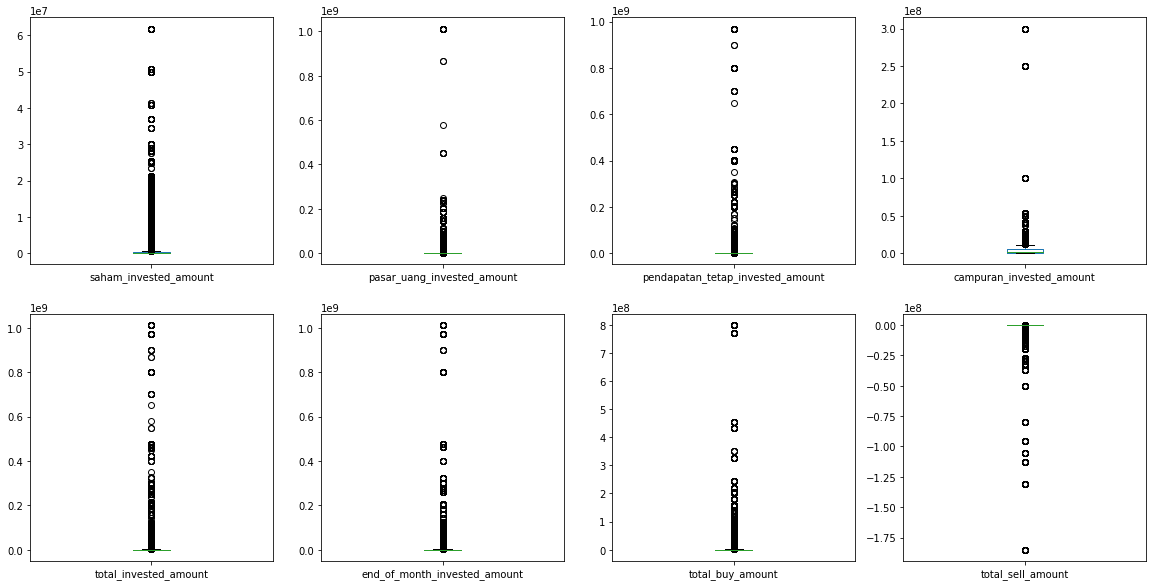

In [ ]:
numerical_column = ['saham_invested_amount', 'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount','end_of_month_invested_amount','total_buy_amount','total_sell_amount']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = df_merged.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

the botplox only contains 0 in this outlier detection, because 0 value in our dataset means they already have a mutual fund but not invest thats why our data outlier looks like this

Further Action: After considering a few days i decide not to do anything with the outlier

Reason:
1. my instinct telling me its wrong to delete outlier because the context in this business is a mutual-fund, there is no limitation in investation
2. i don't have the information whether the outlier true or not, what if its true
3. and actually its because kak Filo told us not to delete outlier inresponsibly because data is a company asset

Pros & cons of my decision leaving outlier as it is:
Pros
- my dataset representing a more comperhensive user_id
Cons
- it will disturbing trend insight the data most likely tend to be higher


what option can i do:
1. remove 0 value and null value temporarily and do outlier analysis and filtering the outlier data and only input non-outlier or removing the highest value of the outlier.
2. separating my analysis outlier and non-outlier, i choose not to do this because time limitation

# D) EDA

## How Many Users do we have in the data

In [ ]:
#to see count, unique, top, and freqency in a column
df_merged['user_id'].describe()

count      158811
unique       8277
top       3740513
freq           42
Name: user_id, dtype: object

We have **8277 users** in the data

### How is the Demographic of the data

Most frequent Data:
Our customer **63% Male** who occupied as a **"Pelajar"** whose **income** **less than 10 million** age around **20-30 years old**

**Pelajar:**

Pelajar (4473 customers) populate as the highest customers in our platform generate the second highest amount of buy transaction.

**Pegawai Swasta:**

Pegawai Swasta (1868 customers) populate as the second highest customers in our platform gain the highest amount of buy trasaction in our platform


In [ ]:
df_merged.groupby('age_category')['user_id'].nunique()

age_category
21-30 years    4481
31-40 years    1364
41-50 years     528
51-60 years     182
< 20 years     1694
> 65 years       28
Name: user_id, dtype: int64

#### Gender

In [ ]:
# Perform the groupby operation and calculate the unique count
grouped_data = df_merged.groupby(['user_gender']).nunique()
user_ids = grouped_data['user_id']  # Extract the 'user_id' column

# Create the pie chart
plt.pie(user_ids, labels=user_ids.index, autopct='%1.0f%%')

# Add a title and adjust the aspect ratio
plt.title('Distribution of User Gender')
plt.axis('equal')

# Display the chart
plt.show()

NameError: ignored

#### Occupation

In [ ]:
#Checking the value each user_occuption
df_merged.groupby('user_occupation')['user_id'].nunique()

user_occupation
Guru            60
IRT            478
Others         928
PNS            116
Pelajar       4473
Pengusaha      324
Pensiunan        4
Swasta        1868
TNI/Polisi      26
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Distribution on Users Occupation')

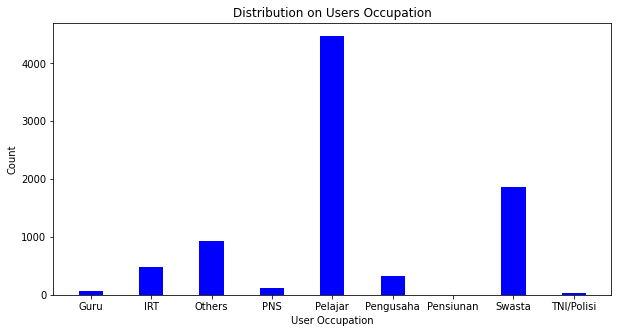

In [ ]:
#manual input distribution unique user by each occuption in our Platform
x = ["Guru","IRT", "Others","PNS","Pelajar","Pengusaha","Pensiunan","Swasta","TNI/Polisi"]
y = [60,478,928,116,4473,324,4,1868,26]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)
plt.xlabel('User Occupation')
plt.ylabel('Count')
plt.title("Distribution on Users Occupation")

In [ ]:
#Looking for a total amount of customers who buy our mutual-fund
df_merged.groupby('user_occupation')['total_buy_amount'].sum()

user_occupation
Guru             476632518
IRT            36754734710
Others         22421221013
PNS             9720572890
Pelajar        68509962615
Pengusaha      52460932593
Pensiunan        170000000
Swasta        127132942814
TNI/Polisi       243194624
Name: total_buy_amount, dtype: int64

Insight: Even though **Swasta** rank number 1 who invest a lot in our platform, **Pelajar** populated twice than pegawai swasta

Recommendation:
- We can target pelajar and swasta for our thematic campaign

#### Referral Code Used

<AxesSubplot:ylabel='user_id'>

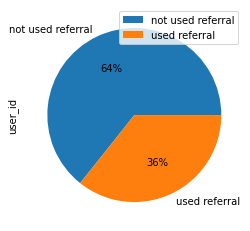

In [ ]:
#Pie Chart
df_merged.groupby(['referral_code_used']).nunique().plot(
    kind='pie', y='user_id', autopct='%1.0f%%')

#### Income Range

In [ ]:
df_merged.groupby('user_income_range')['user_id'].nunique()

user_income_range
100 Juta - 500 Juta       637
500 Juta - 1 Miliar        48
< 10 Juta                3527
> Rp 1 Miliar              16
Rp 10 Juta - 50 Juta     2706
Rp 50 Juta - 100 Juta    1343
Name: user_id, dtype: int64

#### Descriptive information about numeric variable

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['total_buy_amount','total_sell_amount','total_buy_transaction_amount','total_sell_transaction_amount','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount']

desc_eda = df_merged[numeric].describe()
desc_eda.loc['kurtosis'] = df_merged[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_merged[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_merged[numeric].var() #show variance statistic
desc_eda

,total_buy_amount,total_sell_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,158811.000,158811.000,158811.000,158811.000,106292.000,131081.000,105946.000,5352.000,158811.000
mean,2001688.761,-450616.893,78071.226,-15272.637,442339.986,840906.160,1782457.579,7810109.314,2442450.321
std,21171492.890,4822935.009,2723035.017,708837.778,2135788.169,14100826.025,23402369.005,25082608.311,24900778.449
min,0.000,-185000000.000,0.000,-185000000.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,-100000.000,0.000,0.000,10000.000,10000.000,25000.000,750000.000,10000.000
50%,10000.000,0.000,0.000,0.000,50000.000,20000.000,65000.000,1500000.000,100000.000
75%,300000.000,0.000,0.000,0.000,200000.000,110000.000,240000.000,5000000.000,500000.000
max,799500000.000,0.000,450000000.000,0.000,61840000.000,1012200000.000,970000000.000,300000000.000,1012200000.000
kurtosis,952.145,806.841,12381.496,35226.683,276.796,3938.110,1135.145,85.442,986.888
skewness,28.186,-26.142,98.595,-163.012,14.226,57.993,31.312,8.500,28.737


kita bisa lihat skewness dari data kita jauh banget sama ideal yaitu 1%, 2% karna banyak customer kita yang punya saham sebelumnya tapi tidak bertransaksi karena itu distribusi Q1 ada beberapa yang 0

kurtosis melebihi 85 menandakan adanya ekor distribusi yang sangat panjang dan data yang sangat terkonsentrasi di sekitar nilai rata-rata.
fenomena ini terjadi dikarenakan banyaknya value yang 0



#### Descriptive information about datetime numeric value

In [ ]:
df_merged['registration_import_datetime'].describe()

<ipython-input-45-c836a2ac8581>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_merged['registration_import_datetime'].describe()


count                  158811
unique                   6581
top       2021-08-02 13:38:02
freq                      164
first     2021-08-01 00:11:14
last      2021-09-28 13:20:00
Name: registration_import_datetime, dtype: object

Customer yang baru bikin akun di platform kita bulan agustus dimulai tanggal 1 jam 12 malem 11 menit 14 detik, paling sering pada tanggal 2 agustus 2021

In [ ]:
df_merged['date'].describe()

<ipython-input-46-d1a4086abc3a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_merged['date'].describe()


count                  158811
unique                     42
top       2021-09-30 00:00:00
freq                     8277
first     2021-08-04 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

Insight, the frequent time for customer transaction in our platform at 30 September 2021

### How Many Users Buy Product in each mutual fund

Dictionary
*   Buy = The Customer who buy the mutual_fund product
*   Owned but not buy = Customer who **did not buying** mutual_fund product in August - September 2021 but actually **have mutual_fund** in our platform **before** our date
*   Not Owned and not buy = Customer who **only register** in our platform but **not doing transaction** in our platform yet








##### Saham

In [ ]:
Saham = df_merged.groupby(['buy_status_saham'])['user_id'].nunique()
Saham

buy_status_saham
Owned but not buy        5232
buy                      1938
not owned and not buy    8277
Name: user_id, dtype: int64

#### Pasar Uang

In [ ]:
Pasar_uang = df_merged.groupby(['buy_status_pasar_uang'])['user_id'].nunique()
Pasar_uang

buy_status_pasar_uang
Owned but not buy        6471
buy                      2359
not owned and not buy    8277
Name: user_id, dtype: int64

#### Pendapatan Tetap

In [ ]:
Pendapatan_tetap = df_merged.groupby(['buy_status_pendapatan_tetap'])['user_id'].nunique()
Pendapatan_tetap

buy_status_pendapatan_tetap
Owned but not buy        5255
buy                      2240
not owned and not buy    8277
Name: user_id, dtype: int64

#### Campuran

In [ ]:
campuran = df_merged.groupby(['buy_status_campuran'])['user_id'].nunique()
campuran

buy_status_campuran
Owned but not buy         231
buy                        78
not owned and not buy    8276
Name: user_id, dtype: int64

#### Comparisson

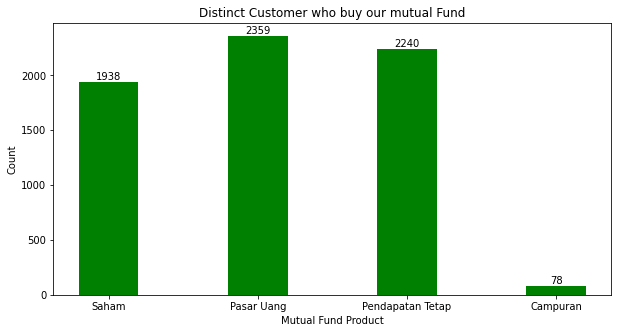

In [ ]:
x = ["Saham","Pasar Uang", "Pendapatan Tetap","Campuran"]
y = [1938,2359,2240,78]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
bars = plt.bar(x, y, color ='green', width = 0.4)

# add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Mutual Fund Product')
plt.ylabel('Count')
plt.title("Distinct Customer who buy our mutual Fund")
plt.show()

## Is there any trend in transaction?

###Monthly & Daily trends on based on IDR transaction

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

#### Trend buy transaction

In [ ]:
##Seeing a daily trend
mbuy_trend = df_merged[['date','total_buy_transaction_amount']]    #Choose the variable we need to make the chart
mbuy_trend['date'] = mbuy_trend['date'].dt.strftime('%m')   #Change the issue month into year,month format to get monthly data

# sort by date
mbuy_trend= mbuy_trend.sort_values('date')

mbuy_trend = mbuy_trend.sort_values('date')  #Sort the values by the issue month, ascending
mbuy_trend = mbuy_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
mbuy_trend = mbuy_trend.reset_index()
mbuy_trend.head()

<ipython-input-53-93243f01cfc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbuy_trend['date'] = mbuy_trend['date'].dt.strftime('%m')   #Change the issue month into year,month format to get monthly data


,date,total_buy_transaction_amount
0,08,3233569943
1,09,9164999466


buying transaction in August and September 2021 increase very steady and dramastically, if we break down by a daily

In [ ]:
##Seeing a daily trend
buy_trend = df_merged[['date','total_buy_transaction_amount']]    #Choose the variable we need to make the chart
buy_trend['date'] = buy_trend['date'].dt.strftime('%m/%d')   #Change the issue month into year,month format to get monthly data

# sort by date
mbuy_trend= mbuy_trend.sort_values('date')

buy_trend = buy_trend.sort_values('date')  #Sort the values by the issue month, ascending
buy_trend = buy_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
buy_trend = buy_trend.reset_index()
buy_trend.head()

<ipython-input-55-a40132ceb7cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_trend['date'] = buy_trend['date'].dt.strftime('%m/%d')   #Change the issue month into year,month format to get monthly data


,date,total_buy_transaction_amount
0,08/04,0
1,08/05,14570000
2,08/06,20880000
3,08/09,40975000
4,08/10,24922709


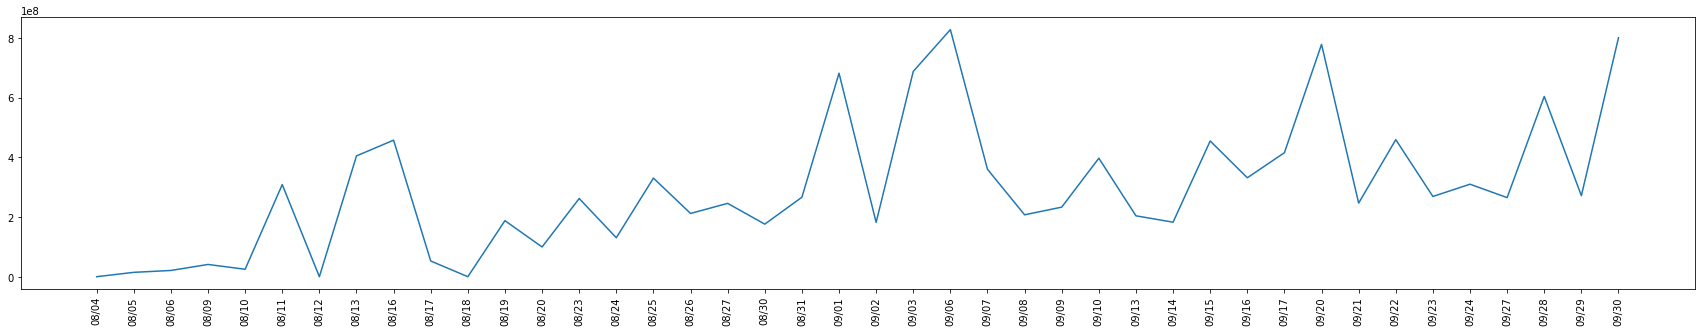

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(buy_trend['date'], buy_trend['total_buy_transaction_amount'])

plt.show()

#### Trend sell transaction

In [ ]:
#Choose the variable we need to make the chart
sell_trend = df_merged[['date','total_sell_transaction_amount']]
#Change the issue month into year,month format to get monthly data
sell_trend['date'] = sell_trend['date'].dt.strftime('%m/%d')
#Sort the values by the issue month, ascending
sell_trend = sell_trend.sort_values('date')
#sum the data and group it by the year_month
sell_trend = sell_trend.groupby('date').sum()
sell_trend = sell_trend.reset_index()
sell_trend.head()

<ipython-input-57-a3652ab04b16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_trend['date'] = sell_trend['date'].dt.strftime('%m/%d')


,date,total_sell_transaction_amount
0,08/04,0
1,08/05,-700000
2,08/06,-1124930
3,08/09,-57814132
4,08/10,-188350000


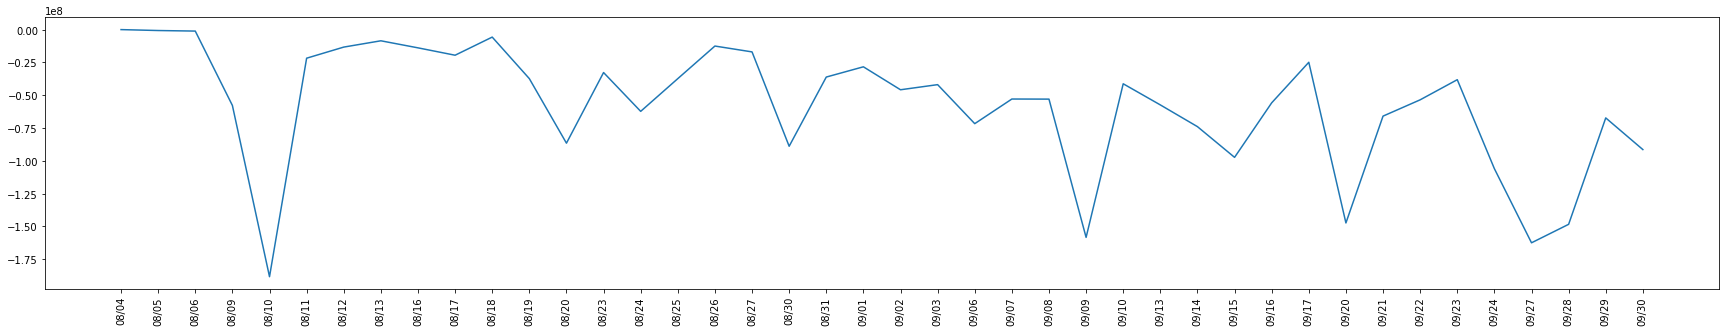

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(sell_trend['date'], sell_trend['total_sell_transaction_amount'])

plt.show()

#### Trend Buy-Sell

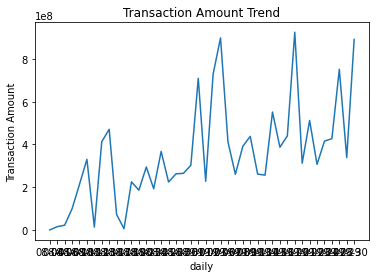

In [ ]:
# Calculate transaction amounts
df_merged['transaction_amount'] = df_merged['total_buy_transaction_amount'] - df_merged['total_sell_transaction_amount']

# Convert date column to datetime and extract month and date
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['daily'] = df_merged['date'].dt.strftime('%m-%d')

# Group data by year and month and calculate total transaction amount
transaction_trend = df_merged.groupby('daily')['transaction_amount'].sum().reset_index()

# Plot the trend using a line plot
plt.plot(transaction_trend['daily'], transaction_trend['transaction_amount'])
plt.xlabel('daily')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Trend')
plt.show()


### Monthly trends based on mutual fund products

##### Saham

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 38 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [ ]:
# select the date and buy_status_saham columns and filter to only include rows where buy_status_saham contains "buy"
saham_buy_trend = df_merged[['date', 'buy_status_saham']][df_merged['buy_status_saham'].str.contains('buy')]

# format the date column as a month string
saham_buy_trend['date'] = saham_buy_trend['date'].dt.strftime('%m-%d')

# group the data by month and count the number of buy transactions
saham_buy_trend = saham_buy_trend.groupby('date').count()

# sort by date
saham_buy_trend = saham_buy_trend.sort_values('date')

# reset the index to make 'date' a column again
saham_buy_trend = saham_buy_trend.reset_index()

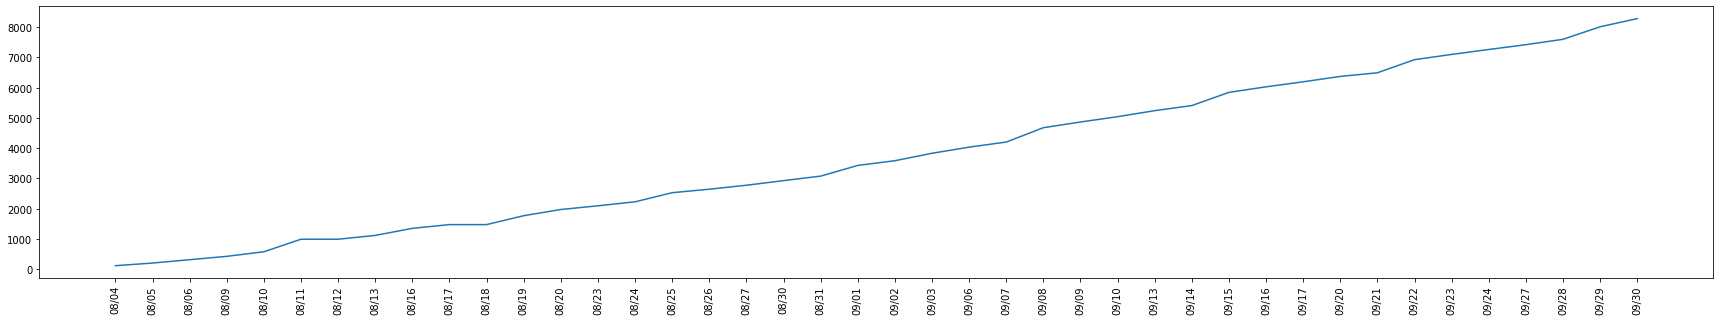

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(buy_trend['date'], saham_buy_trend['buy_status_saham'])

plt.show()

#### Pasar Uang

In [ ]:
# select the date and buy_status_saham columns and filter to only include rows where buy_status_saham contains "buy"
pasar_uang_buy_trend = df_merged[['date', 'buy_status_pasar_uang']][df_merged['buy_status_pasar_uang'].str.contains('buy')]

# format the date column as a month string
pasar_uang_buy_trend['date'] = pasar_uang_buy_trend['date'].dt.strftime('%m-%d')

# group the data by month and count the number of buy transactions
pasar_uang_buy_trend = pasar_uang_buy_trend.groupby('date').count()

# sort by date
pasar_uang_buy_trend = pasar_uang_buy_trend.sort_values('date')

# reset the index to make 'date' a column again
pasar_uang_buy_trend = pasar_uang_buy_trend.reset_index()

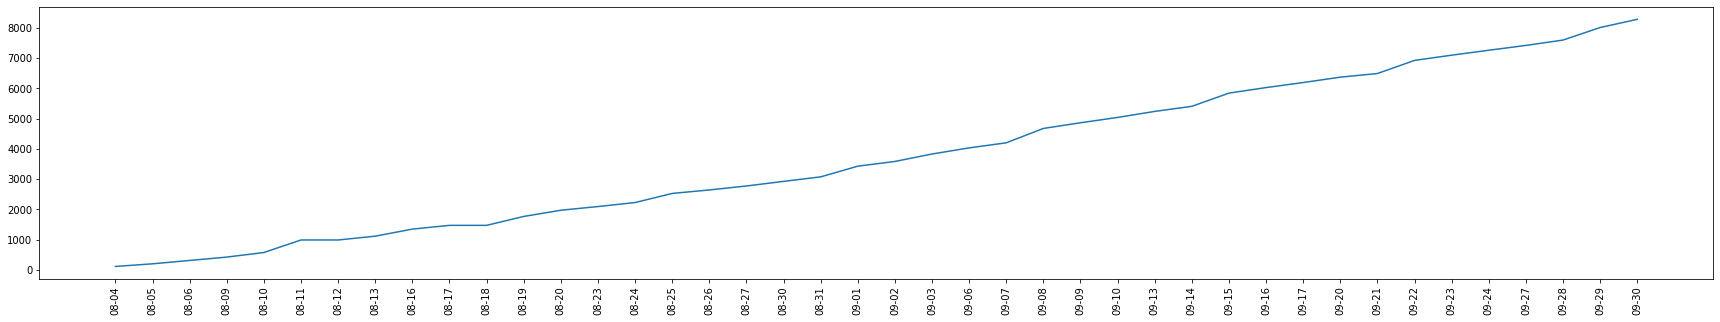

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(pasar_uang_buy_trend['date'], pasar_uang_buy_trend['buy_status_pasar_uang'])

plt.show()

#### Pendapatan Tetap

In [ ]:
# select the date and buy_status_saham columns and filter to only include rows where buy_status_saham contains "buy"
Pendapatan_tetap_buy_trend = df_merged[['date', 'buy_status_pendapatan_tetap']][df_merged['buy_status_pendapatan_tetap'].str.contains('buy')]


# format the date column as a month string
Pendapatan_tetap_buy_trend['date'] = Pendapatan_tetap_buy_trend['date'].dt.strftime('%m-%d')


# group the data by month and count the number of buy transactions
Pendapatan_tetap_buy_trend = Pendapatan_tetap_buy_trend.groupby('date').count()


# sort by date
Pendapatan_tetap_buy_trend = Pendapatan_tetap_buy_trend.sort_values('date')


# reset the index to make 'date' a column again
Pendapatan_tetap_buy_trend = Pendapatan_tetap_buy_trend.reset_index()



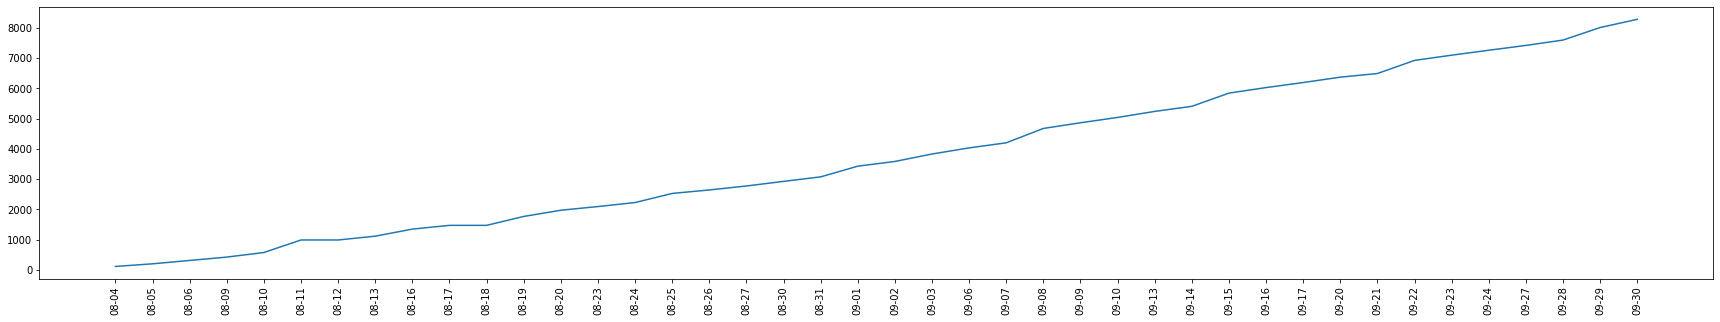

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(Pendapatan_tetap_buy_trend['date'], Pendapatan_tetap_buy_trend['buy_status_pendapatan_tetap'])

plt.show()

#### Campuran

In [ ]:
# select the date and buy_status_saham columns and filter to only include rows where buy_status_saham contains "buy"
Campuran_buy_trend = df_merged[['date', 'buy_status_campuran']][df_merged['buy_status_campuran'].str.contains('buy')]


# format the date column as a month string
Campuran_buy_trend['date'] = Campuran_buy_trend['date'].dt.strftime('%m-%d')


# group the data by month and count the number of buy transactions
Campuran_buy_trend = Campuran_buy_trend.groupby('date').count()


# sort by date
Campuran_buy_trend = Campuran_buy_trend.sort_values('date')


# reset the index to make 'date' a column again
Campuran_buy_trend = Campuran_buy_trend.reset_index()



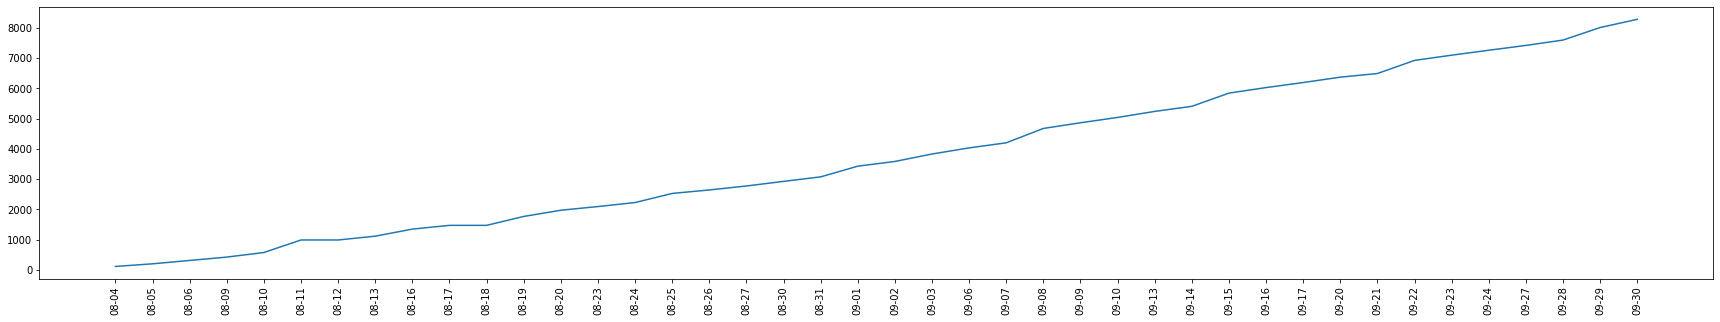

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(Campuran_buy_trend['date'], Campuran_buy_trend['buy_status_campuran'])

plt.show()

Insight:

for all product saham, pasar uang, pendapatan tetap and campura increase for the the past 2 months increase every date

#Milestone 2

In [ ]:
df_segmentation = df_merged.copy()
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 38 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [ ]:
df_segmentation.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,buy_status_saham,sell_status_saham,buy_status_pasar_uang,sell_status_pasar_uang,buy_status_pendapatan_tetap,sell_status_pendapatan_tetap,buy_status_campuran,sell_status_campuran,transaction_amount,daily
0,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-17
1,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-18
2,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-19
3,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-20
4,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not used referral,Gaji,600000,100000,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-23


In [ ]:
df_segmentation[['daily', 'date']].head(100)

,daily,date
0,08-17,2021-08-17
1,08-18,2021-08-18
2,08-19,2021-08-19
3,08-20,2021-08-20
4,08-23,2021-08-23
...,...,...
95,08-23,2021-08-23
96,08-24,2021-08-24
97,08-25,2021-08-25
98,08-26,2021-08-26


In [ ]:
df_segmentation['transaction_amount'].value_counts()

0            147823
100000         1902
10000          1166
25000           745
500000          578
              ...  
79998             1
79691             1
139691            1
100026535         1
42274             1
Name: transaction_amount, Length: 1378, dtype: int64

## Clustering

In [ ]:
df_clustering = df_segmentation.copy()

In [ ]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 38 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

### Clustering Preparation

#### Clustering Understanding

There are a few condition that should be considered when doing a clustering
1. Clustering contains a 'numerical value', a text value can't be clustered by K-emeans
2. 0 value in our dataset can be tricky to handle because it is not **"missing at random"**, 0 value means the user_id not buy anything at. if we are not excluding them it will distrub our clustering.


What i do:
- i'm leaving zero value as it is even though it might potentially lead to data bias excluding 0 value might be unwise because the 0 value contains insight that we can use


what option can i do:
- i could use zero-inflated clustering
- i could excluding 0 value in the first place and adding back after clustering

why i **choose not to** zero-inflated clustering:

Even though The **main advantage** of zero-inflated clustering is that it allows for the identification of two distinct groups: one group with zero values and another group with non-zero values

- zero-inflated clustering may not always provide the most accurate or useful results especially if the zero values are not truly "excess" zeros but instead represent a meaningful part of the data
- zero-inflated clustering can be more complex and computationally intensive than traditional clustering methods, such as k-means clustering. It also requires more specialized knowledge and expertise to implement, as it involves modeling both the presence and absence of zeros in the data.
- it simply i haven't understand the concept fully yet

why i **choose not to** excluding 0 value in the first place and adding back after clustering:
- because this decision might lead to missing part of the data such as customer ID who have high,medium, low income who didn't invest in our mutual-fund. it is really neccesary information for thematic campaign, missing this value would be problematic

#### Data Checking and treatment

In [ ]:
#Checking Null value in total_invested_amount
df_clustering['total_invested_amount'].value_counts()

0           32577
100000      25932
10000       11192
200000       9936
500000       6069
            ...  
417000          1
92050000        1
1655000         1
1555000         1
8274800         1
Name: total_invested_amount, Length: 2727, dtype: int64

In [ ]:
df_clustering['user_age'].value_counts()

21    13574
20    12229
23    10771
22    10627
24     9837
19     9800
25     8930
18     8667
26     7424
28     6955
27     6633
29     6480
30     4662
31     4224
32     3656
35     3163
33     2801
36     2684
34     2442
17     2150
37     1959
42     1887
38     1809
40     1478
39     1464
41     1245
44     1127
43     1062
49      992
46      979
48      882
47      843
45      822
51      687
54      662
50      581
52      515
53      411
56      290
57      266
55      258
59      154
58      148
61      108
60       99
64       85
65       74
67       37
76       37
73       37
71       32
66       25
62       21
83       12
74        7
82        7
Name: user_age, dtype: int64

In [ ]:
df_cluster = df_clustering.groupby('user_id').agg({'user_age': 'first', 'total_invested_amount': 'mean'}).reset_index()
df_cluster

,user_id,user_age,total_invested_amount
0,1004326,30,200000.000
1,1005053,31,200000.000
2,1005165,22,100000.000
3,1018814,20,1073913.043
4,1023627,33,100000.000
...,...,...,...
8272,988940,27,500000.000
8273,989618,29,1933333.333
8274,990466,33,1010000.000
8275,99245,25,1000000.000


In [ ]:
df_cluster['total_invested_amount'].describe()

count        8277.000
mean      2094008.270
std      21546590.817
min             0.000
25%         19666.667
50%        101025.641
75%        477142.857
max     977771428.571
Name: total_invested_amount, dtype: float64

In [ ]:
import plotly.express as px

# create a boxplot using the filtered data
fig = px.box(df_cluster, y='total_invested_amount')

# show the plot
fig.show()

In [ ]:
# create a boxplot using the filtered data
fig = px.box(df_cluster, y='user_age')

# show the plot
fig.show()

##### Check Data Distribution

<AxesSubplot:xlabel='total_invested_amount', ylabel='user_age'>

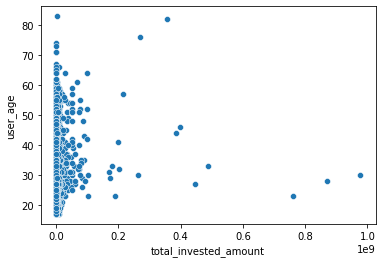

In [ ]:
sns.scatterplot(data = df_cluster, x='total_invested_amount', y='user_age')

##### Robust Scaler

In [ ]:
#Scaling
# Define Robust Scale dataset
rs_scale_df = df_cluster
column = df_cluster.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['total_invested_amount', 'user_age']] = rs_scaler.fit_transform(rs_scale_df[['total_invested_amount', 'user_age']])

<AxesSubplot:xlabel='total_invested_amount', ylabel='user_age'>

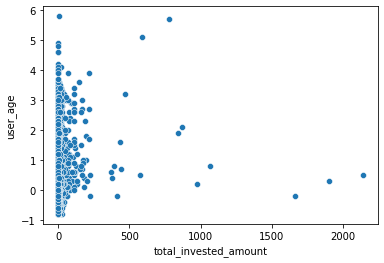

In [ ]:
sns.scatterplot (data = rs_scale_df, x='total_invested_amount', y='user_age')

i use robust scaller because my data contains a lot of outlier thats why robust scaling comes into consideration

##### Cluster

###### Elbow Method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

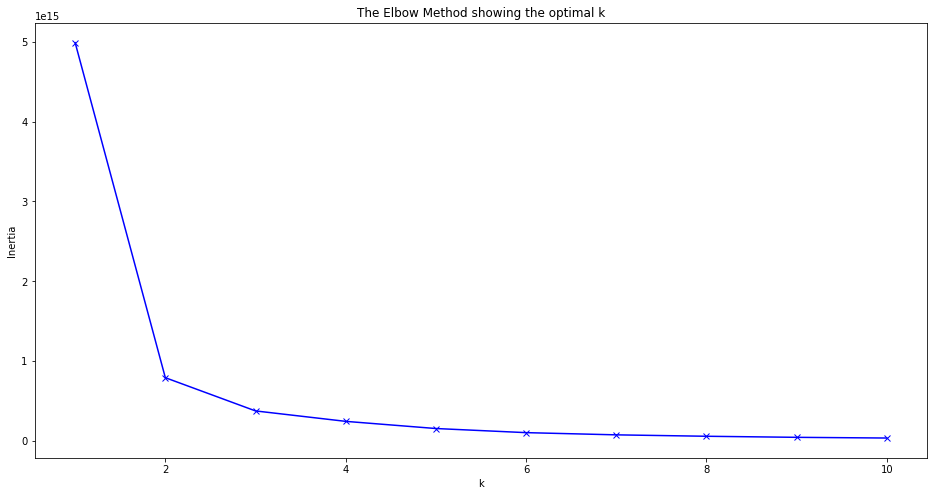

[4987185593471110.0, 793572733007930.5, 377680793161427.4, 247073185329025.03, 157400739838258.34, 105814466317261.8, 78219985393155.33, 60516952081493.734, 47150686622719.68, 38329200472796.664]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(rs_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

Insight:
point elbow that might suitted for clustering is 4,5,6,...,10 and so on

to-do:
i choose to see silhouette score 1-10 actually 3,4,5 might be enough but i just want to see the corelation between silhouette score in different clustering

#### Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[1,2,3,4,5,6,7,8,9,10]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.9940706180246786


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 The average silhouette_score is : 0.98944278920786


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.9717575341263816


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5 The average silhouette_score is : 0.9621967578837713


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6 The average silhouette_score is : 0.919812462274615


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7 The average silhouette_score is : 0.9015199054573741


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8 The average silhouette_score is : 0.9013410760947655


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9 The average silhouette_score is : 0.9012500121415193


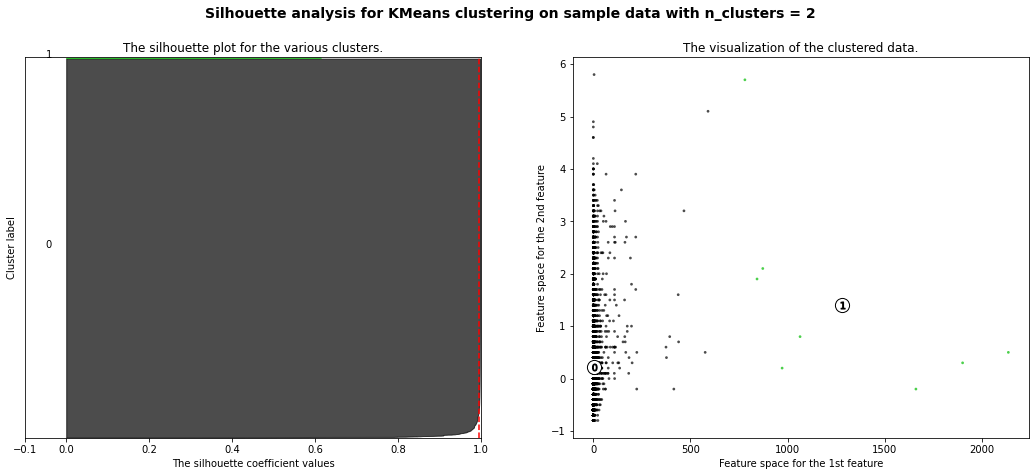

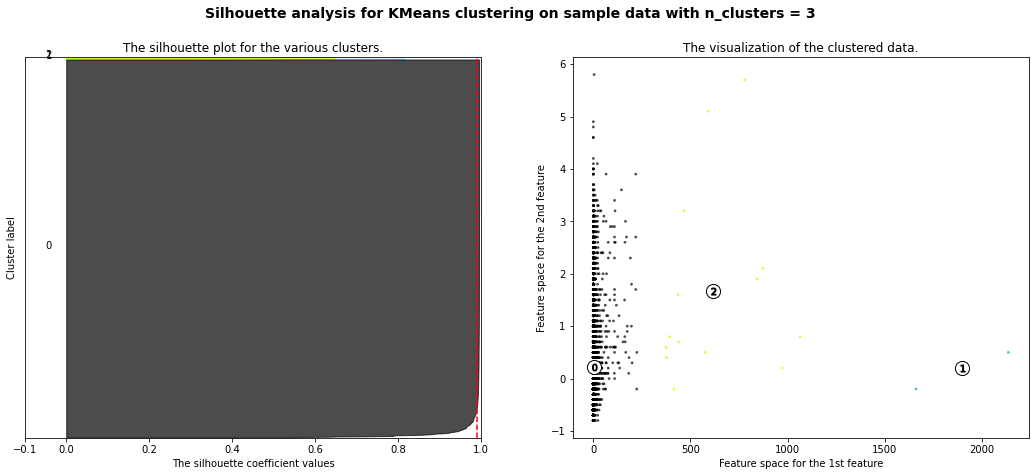

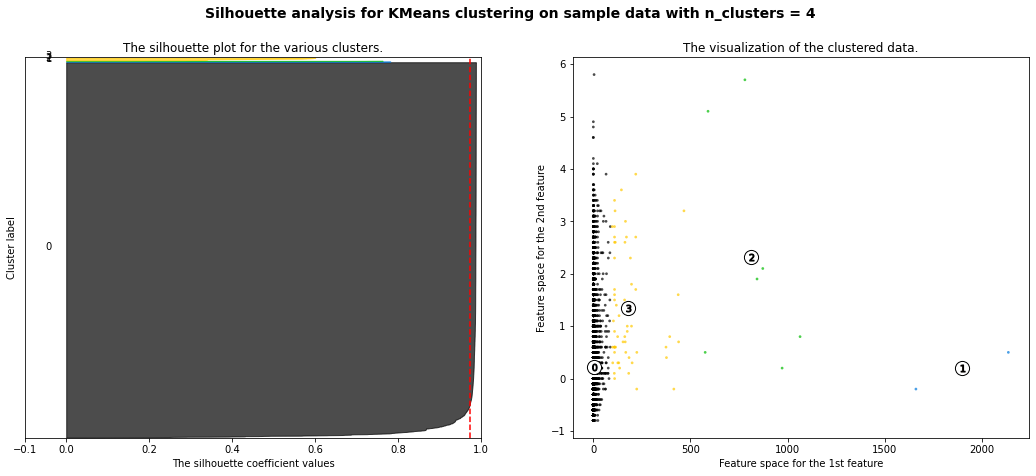

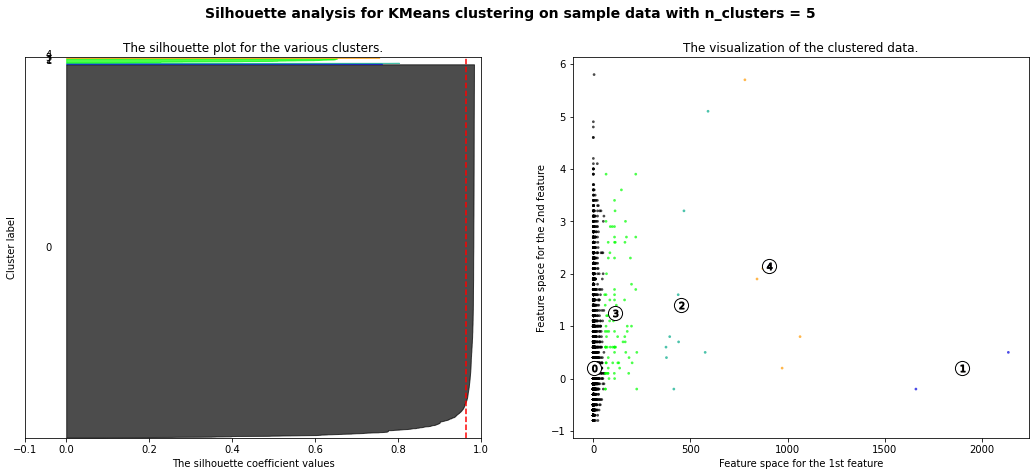

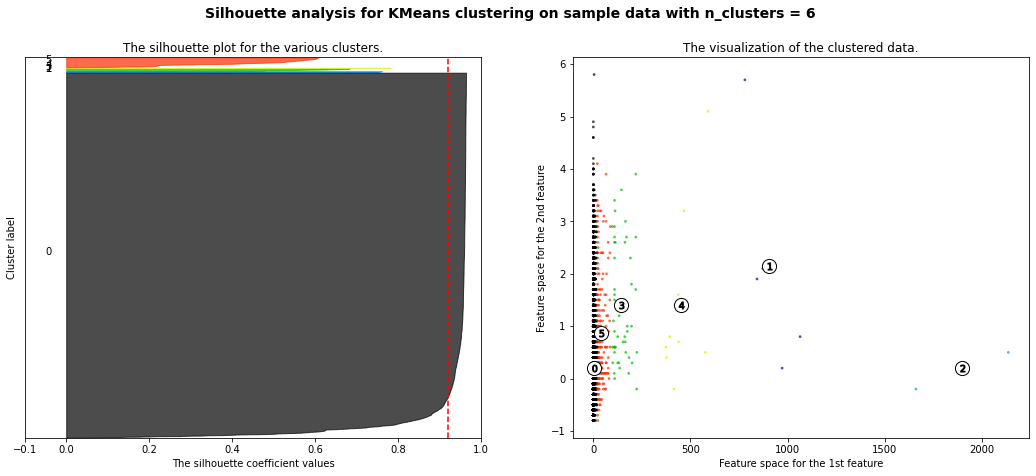

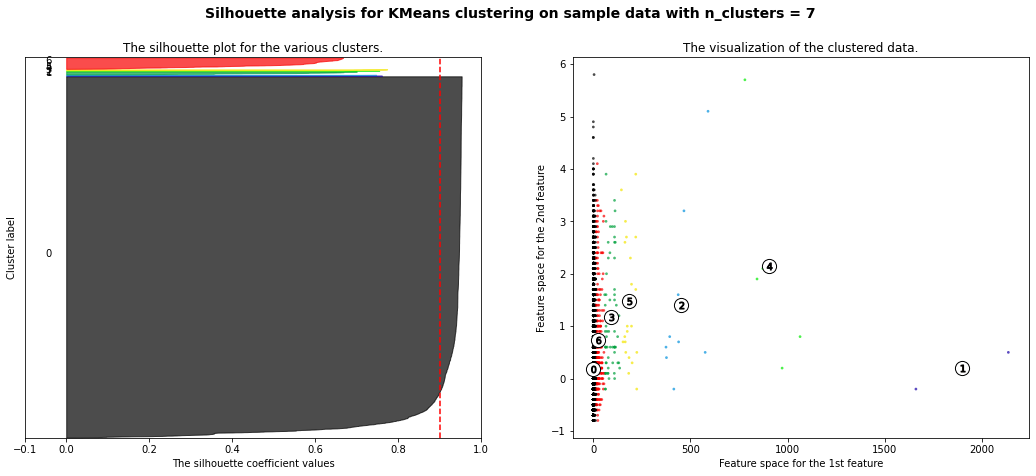

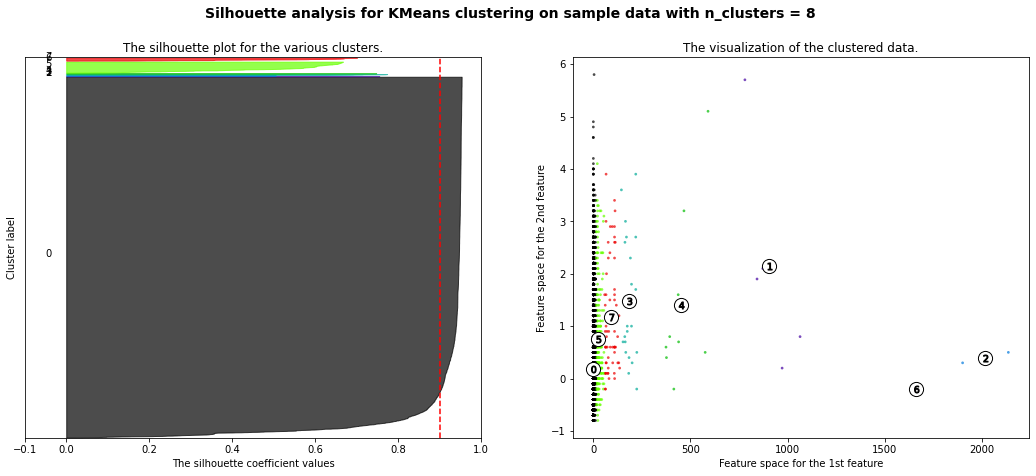

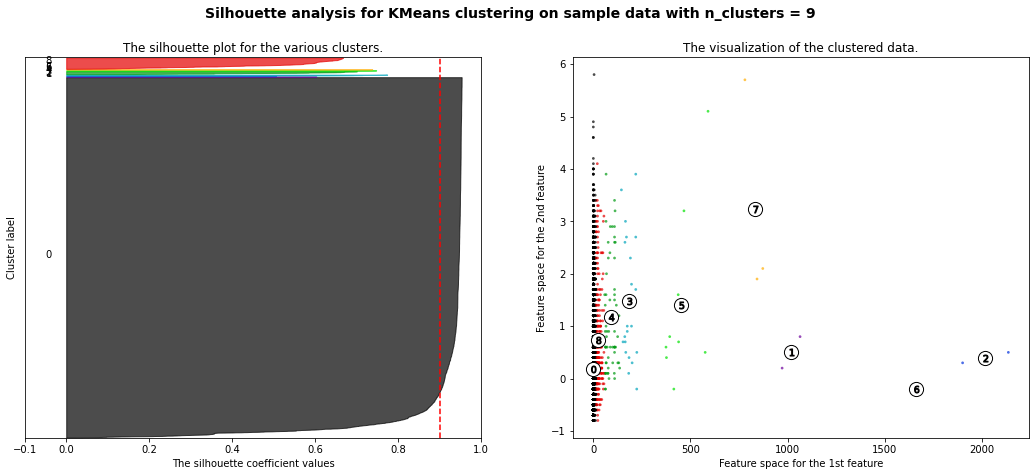

In [ ]:
silhoutte_analysis(rs_scale_df[['total_invested_amount', 'user_age']],list(range(2,10)))                   #------Tinggal ganti di variablenya dan rangenya

If we see from silhouette score above cluster n_2 its the highest amount of silhouette score and when we do clustering (3..4..5) the silhouette score become smaller

even though n_cluster 2 as the highest, i choose n_cluster 4 because clarifying 2 segmentation for thematic campaign i'm afraid will not answer my business problem segmentation customer for thematic campaign

n_clusters = 2 = 0.99

n_clusters = 3 = 0.98

n_clusters = 4 = 0.97

n_clusters = 5 = 0.96

n_clusters = 6 = 0.91

n_clusters = 7 = 0.90

n_clusters = 8 = 0.90

n_clusters = 9 = 0.90


In [ ]:
# make cluster
Cluster_4 = rs_scale_df.copy()

cluster_model = KMeans(n_clusters=4)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_4[['total_invested_amount', 'user_age']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,user_id,user_age,total_invested_amount,cluster
0,1004326,0.500,0.216,0
1,1005053,0.600,0.216,0
2,1005165,-0.300,-0.002,0
3,1018814,-0.500,2.127,0
4,1023627,0.800,-0.002,0


### Segmentation

<AxesSubplot:xlabel='cluster', ylabel='total_invested_amount'>

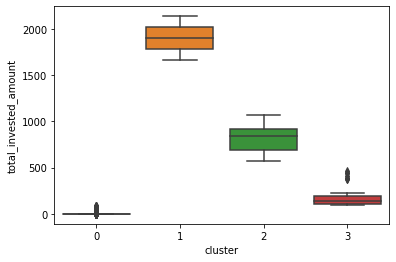

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='total_invested_amount')

Insight:
total amount of invest in cluster 0 is located at 0 and between 0 - 500 this customer segmentation would

cluster 1 who has the highest total_invested amount,

cluster 2 who invest in the middle

cluster 3 whose invest as below

<AxesSubplot:xlabel='cluster', ylabel='user_age'>

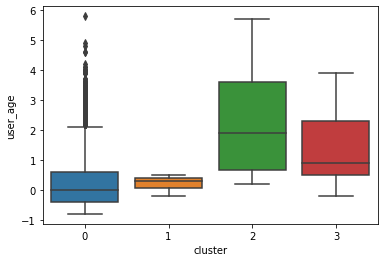

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='user_age')

Insight
cluster 0 as the youngest amount of other cluster

cluster 1 still in cluster 0 range but its below slightly higher than cluster 0

cluster 2 is the oldest among of other cluster

cluster 3 is slightly younger than cluster 2

### Merge Hasil Cluster dengan dataset

In [ ]:
df_segmented = Cluster_4.merge(df_segmentation,how= 'inner', on = 'user_id')
df_segmented

,user_id,user_age_x,total_invested_amount_x,cluster,registration_import_datetime,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,...,buy_status_saham,sell_status_saham,buy_status_pasar_uang,sell_status_pasar_uang,buy_status_pendapatan_tetap,sell_status_pendapatan_tetap,buy_status_campuran,sell_status_campuran,transaction_amount,daily
0,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,...,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-19
1,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-20
2,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-23
3,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-24
4,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,997938,0.200,0.127,0,2021-08-02 10:16:38,Male,27,Others,< 10 Juta,used referral,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,09-24
158807,997938,0.200,0.127,0,2021-08-02 10:16:38,Male,27,Others,< 10 Juta,used referral,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,09-27
158808,997938,0.200,0.127,0,2021-08-02 10:16:38,Male,27,Others,< 10 Juta,used referral,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,09-28
158809,997938,0.200,0.127,0,2021-08-02 10:16:38,Male,27,Others,< 10 Juta,used referral,...,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,09-29


### Visualize Cluster

For no we call our clusters as is, then we will create an interesting name for naming the cluster

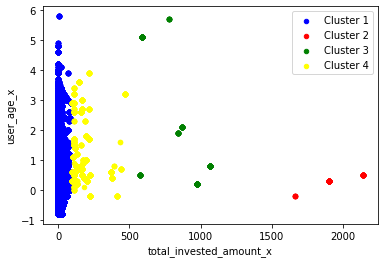

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='total_invested_amount_x', y='user_age_x', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='total_invested_amount_x', y='user_age_x', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='total_invested_amount_x', y='user_age_x', c='green', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='total_invested_amount_x', y='user_age_x', c='yellow', label='Cluster 4', ax = cluster_scatter)

#### Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['total_invested_amount_x','user_age_x']].agg(['count','mean','min','max','median']).T


cluster                                 0        1        2        3
total_invested_amount_x count  157344.000   63.000  177.000 1227.000
                        mean        2.101 1960.960  837.230  171.552
                        min        -0.221 1661.068  575.857   97.648
                        max        87.215 2137.096 1064.489  466.626
                        median      0.052 1901.517  872.497  144.501
user_age_x              count  157344.000   63.000  177.000 1227.000
                        mean        0.210    0.327    1.975    1.285
                        min        -0.800   -0.200    0.200   -0.200
                        max         5.800    0.500    5.700    3.900
                        median      0.000    0.300    0.800    0.800

Based on our clustering analysis, we have observed that the majority of our platform's users fall into Cluster 0. However, there are two potential explanations for this: either our platform is more popular among individuals in Cluster 0 or there may be an issue with our data. At this time, we have decided to take no action until we have further evidence to support either possibility.

#### Cluster Interpretation

To Check what can be analyzed

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,user_age_x,total_invested_amount_x,cluster,registration_import_datetime,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_category,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount_y,buy_status_saham,sell_status_saham,buy_status_pasar_uang,sell_status_pasar_uang,buy_status_pendapatan_tetap,sell_status_pendapatan_tetap,buy_status_campuran,sell_status_campuran,transaction_amount,daily
0,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,Gaji,200000,0,0,21-30 years,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,90000.000,20000.000,90000.000,NaN,200000,not owned and not buy,not owned and not sell,not owned and not buy,not owned and not sell,not owned and not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-19
1,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,Gaji,200000,0,0,21-30 years,2021-08-20,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,0,0,90000.000,20000.000,90000.000,NaN,200000,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-20
2,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,Gaji,200000,0,0,21-30 years,2021-08-23,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,0,0,90000.000,20000.000,90000.000,NaN,200000,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-23
3,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,Gaji,200000,0,0,21-30 years,2021-08-24,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,0,0,90000.000,20000.000,90000.000,NaN,200000,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-24
4,1004326,0.500,0.216,0,2021-08-13 14:56:59,Female,30,Pelajar,Rp 50 Juta - 100 Juta,not used referral,Gaji,200000,0,0,21-30 years,2021-08-25,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,0,0,90000.000,20000.000,90000.000,NaN,200000,Owned but not buy,not owned and not sell,Owned but not buy,not owned and not sell,Owned but not buy,not owned not sell,not owned and not buy,Not owned and not sell,0,08-25


##### Invested Amount

In [ ]:
result = df_segmented.groupby('cluster').agg(
    total_invested_amount=('total_invested_amount_x', 'sum'),
    count_user_id=('user_id', 'nunique')
).reset_index()

print(result)

   cluster  total_invested_amount  count_user_id
0        0             330591.902           8210
1        1             123540.496              3
2        2             148189.651              7
3        3             210494.012             57


##### Daily Transaction

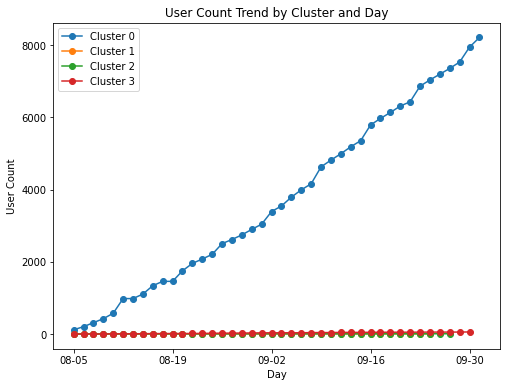

In [ ]:
result = df_segmented.groupby(['cluster', 'daily'])['user_id'].nunique().reset_index(name='count_user_id')

fig, ax = plt.subplots(figsize=(8,6))

for cluster, data in result.groupby('cluster'):
    data.plot(x='daily', y='count_user_id', ax=ax, label=f'Cluster {cluster}', marker='o')

plt.title('User Count Trend by Cluster and Day')
plt.xlabel('Day')
plt.ylabel('User Count')
plt.legend()
plt.show()

most of customers in our platform clustered in cluster 0 thats why we can see the line chart always increasing while cluster 1, 2, 3 fall behind the others

if its for purpose marketing campaign we might prioritizng cluster 0 because possibly its the most popular

##### Gender

In [ ]:
df_segmented.groupby(['cluster','user_gender'], as_index = False)['user_id'].count()

,cluster,user_gender,user_id
0,0,Female,60891
1,0,Male,96453
2,1,Female,58
3,1,Male,5
4,2,Female,60
5,2,Male,117
6,3,Female,653
7,3,Male,574


Insight:

0 = Male = 61.30%, Female 38.70%

1 = Male = 66.10%, Female 33.9%

2 = Male = 7.94%, Female 92.06%

3 = Male = 46.78%, Female 53.22%


##### Age

In [ ]:
df_segmented.groupby(['cluster','age_category'], as_index = False)['user_id'].count()

,cluster,age_category,user_id
0,0,21-30 years,85436
1,0,31-40 years,25153
2,0,41-50 years,10258
3,0,51-60 years,3256
4,0,< 20 years,32846
5,0,> 65 years,395
6,1,21-30 years,63
7,2,21-30 years,59
8,2,31-40 years,38
9,2,41-50 years,36


Insight:

0 = 21-30 years old = 54%

1 = 21-30 years old = 100%

2 = 21 - 30 years old (33%), >65 years old (24%) = 56%


3 = 31 - 40 years old (40%)

##### Occupation

In [ ]:
df_segmented.groupby(['cluster','user_occupation'], as_index = False)['user_id'].count()

,cluster,user_occupation,user_id
0,0,Guru,1103
1,0,IRT,7864
2,0,Others,15650
3,0,PNS,2561
4,0,Pelajar,88663
5,0,Pengusaha,5504
6,0,Pensiunan,87
7,0,Swasta,35382
8,0,TNI/Polisi,530
9,1,IRT,21


Insight:

0 = Pelajar (56%) + Swasta(22%) = 78%

1= Swasta (58%) + Ibu Rumah Tangga (33%) = 91%

2 = Pengusaha (59%) + Ibu Rumah Tangga (21%) = 80%

3 = Pengusaha (52%) + Swasta (31%) = 83%


##### Income Range

In [ ]:
df_segmented.groupby(['cluster','user_income_range'], as_index = False)['user_id'].count()

,cluster,user_income_range,user_id
0,0,100 Juta - 500 Juta,12050
1,0,500 Juta - 1 Miliar,922
2,0,< 10 Juta,68394
3,0,> Rp 1 Miliar,311
4,0,Rp 10 Juta - 50 Juta,49559
5,0,Rp 50 Juta - 100 Juta,26108
6,1,100 Juta - 500 Juta,5
7,1,Rp 50 Juta - 100 Juta,58
8,2,100 Juta - 500 Juta,117
9,2,500 Juta - 1 Miliar,22


Insight:

0 = 0-50 juta = 74.97%

1= 100-500 juta = 66.1%

2= 50 juta - 100 juta = 89%

3 = 100 juta - 500 juta (38%) + 50 juta - 100 juta (26%) = 65%

##### Referral_code_used

In [ ]:
df_segmented.groupby(['cluster','referral_code_used'], as_index = False)['user_id'].count()

,cluster,referral_code_used,user_id
0,0,not used referral,106594
1,0,used referral,50750
2,1,not used referral,26
3,1,used referral,37
4,2,not used referral,99
5,2,used referral,78
6,3,not used referral,721
7,3,used referral,506


Insight

0 = Not Used Referral = 67%

1 = Not Used Referral = 55%

2 = used refferal = 58%

3 = not used referral = 58%

##### User Income Source

In [ ]:
df_segmented.groupby(['cluster','user_income_source'], as_index = False)['user_id'].count()

,cluster,user_income_source,user_id
0,0,Bunga Simpanan,183
1,0,Dari Orang Tua / Anak,8779
2,0,Dari Suami / istri,924
3,0,Gaji,98758
4,0,Hasil Investasi,1221
5,0,Keuntungan Bisnis,17125
6,0,Lainnya,4539
7,0,Tabungan,4879
8,0,Undian,20470
9,0,Warisan,466


Insight

0 = 62% Gaji

1= 54% Gaji

2= 68% Gaji

3= 58% Gaji

##### Total Buy Amount

In [ ]:
result = df_segmented.groupby('cluster').agg(
    avg_total_buy_amount=('total_buy_amount', 'mean'),
    count_user_id=('user_id', 'nunique')
).reset_index()

print(result)

   cluster  avg_total_buy_amount  count_user_id
0        0            903300.520           8210
1        1         624600000.000              3
2        2         327603473.136              7
3        3          63916594.957             57


##### Total Sell Amount

In [ ]:
result = df_segmented.groupby('cluster').agg(
    avg_total_sell_amount=('total_sell_amount', 'mean'),
    count_user_id=('user_id', 'nunique')
).reset_index()

#print(result)

   cluster  avg_total_sell_amount  count_user_id
0        0            -328034.371           8210
1        1                  0.000              3
2        2          -40869895.266              7
3        3          -10362435.008             57


### PPT


https://docs.google.com/presentation/d/148wVzrYWdlqmnbGf1mMXYL_5kULkqwNe/edit?usp=sharing&ouid=115822264535138415644&rtpof=true&sd=true